In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd drive
%cd MyDrive
%cd 'Data Science Group Project - Big Data Course'

c = pd.read_csv('completed_matches.csv').drop('Unnamed: 0', axis=1) # completed_matches
u = pd.read_csv('upcoming_matches.csv').drop('Unnamed: 0', axis=1) # upcoming matches
p = pd.read_csv('players.csv').drop('Unnamed: 0', axis=1) # players


Mounted at /content/drive
/content/drive
/content/drive/MyDrive
/content/drive/MyDrive/Data Science Group Project - Big Data Course


In [4]:
c.head()
c.columns
p.columns

Index(['player_url', 'player_name', 'wins', 'losses', 'ties', 'nc',
       'total_matches', 'height', 'weight', 'reach', 'stance', 'age', 'ss',
       'ss_acc', 'ss_abs', 'ss_def', 'td', 'td_acc', 'td_def', 'sub', 'prev',
       'weight_class'],
      dtype='object')

In [13]:
c['ctrl_diff'] = c['ctrl'] - c['o_ctrl']

In [14]:
def clean_c(df):

  print('Data cleaning. Starting shape:', df.shape)

  # Counting nan values in all fields
  print('Fill NAs with median of dimension')
  print([(x, y) for x, y in zip(df.isna().sum(), df.isna().sum().index) if x > 0])
  # Fill NAs with the median value of each column
  median_values = df.select_dtypes(include=['int64', 'float64']).median()
  df = df.fillna(median_values)
  print(df.shape)

  print('Remove events befor 2013 for relevance')
  df = df.loc[(df.event_year >= 2013)]

  return df

In [15]:
c = clean_c(c)

Data cleaning. Starting shape: (4753, 79)
Fill NAs with median of dimension
[]
(4753, 79)
Remove events befor 2013 for relevance


In [16]:
# Clean data frame

c1 = c.copy()

diffs = c1.loc[:,
              (c1.columns.str.contains('diff|win'))
              ]

diffs.columns


Index(['win', 'wins_diff', 'losses_diff', 'ties_diff', 'nc_diff',
       'total_matches_diff', 'height_diff', 'weight_diff', 'reach_diff',
       'stance_diff', 'age_diff', 'ss_diff', 'ss_acc_diff', 'ss_abs_diff',
       'ss_def_diff', 'td_diff', 'td_acc_diff', 'td_def_diff', 'sub_diff',
       'prev_diff', 'ctrl_diff'],
      dtype='object')

<Axes: xlabel='ctrl_diff', ylabel='Density'>

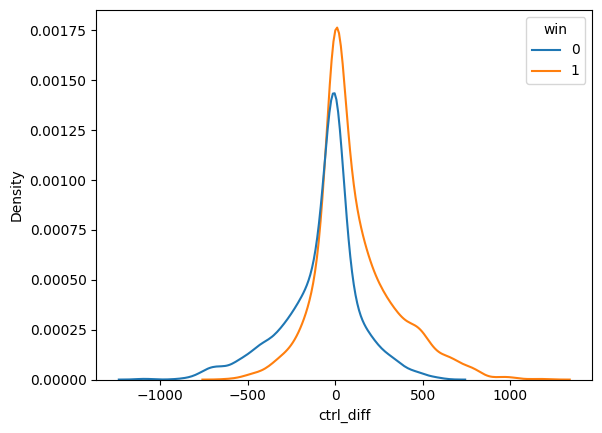

In [17]:
from scipy.stats import gaussian_kde

ctrl_diff = c1[['win', 'ctrl_diff']]
ctrl_diff

sns.kdeplot(data=ctrl_diff, x="ctrl_diff", hue="win")